<a href="https://colab.research.google.com/github/Riochin/Zerokara-Deep-Learning/blob/main/3_5_design_of_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 3.5 出力層の設計
> 回帰・分類のどちらを用いるかにより出力層の活性化関数を変更

> - 回帰：恒等関数
> - 分類：ソフトマックス関数

## 3.5.1 恒等関数とソフトマックス関数

### ソフトマックス関数
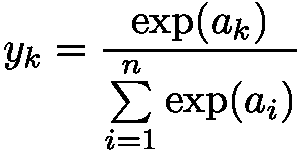!

In [2]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a) # 指数関数
print(exp_a)

sum_exp_a = np.sum(exp_a) # 指数関数の和（分母）
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [3]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 ソフトマックス関数実装上の注意
> aの値が大きすぎるとオーバーフロー

#### 改善案

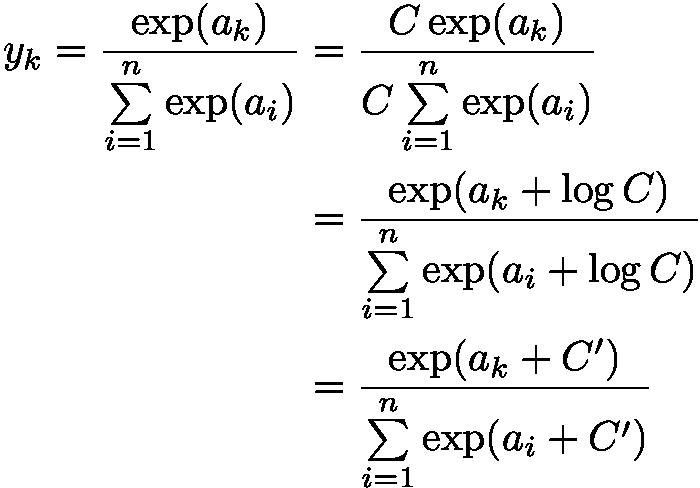

#### 具体例

In [4]:
a = np.array([1010,1000,990])
np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算 , 正しく計算されない

<ipython-input-4-3e2dc413231c>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算 , 正しく計算されない
<ipython-input-4-3e2dc413231c>:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算 , 正しく計算されない


array([nan, nan, nan])

In [7]:
c = np.max(a) # 1010
a-c

np.exp(a - c) / np.sum(np.exp( a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

> 入力の最大値で引いて解決！

#### これで解決！

In [8]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 ソフトマックス関数の特徴

In [10]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)

np.sum(y)

[0.01821127 0.24519181 0.73659691]


np.float64(1.0)

- 出力が 0 ~ 1の間になる
- 総和が1になる
**-> 確率として捉えることができる**
- 各要素の代償関係は変化しない

> 「分類」では一番大きいニューロンに相当するクラスが認識結果となるため、出力層のソフトマックス関数を省略可能！

> *「じゃあなんで分類にソフトマックス関数を使うの？」*

という疑問へは、次章にて解説！

## 3.5.4 出力層のニューロン数

- 出力層のニューロン数は、問題に応じて決定

> 分類：分類したいクラス数

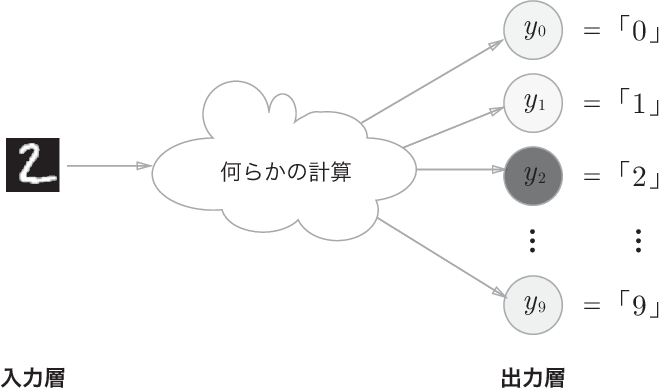